In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
import lightgbm as lgb
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [6]:
# Load the dataset
df = pd.read_csv('../data/splunk_logs.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (50000, 7)

Column names: ['timestamp', 'source_ip', 'event_type', 'error_code', 'message_length', 'freq_similar_alerts', 'critical']

First few rows:


,timestamp,source_ip,event_type,error_code,message_length,freq_similar_alerts,critical
0,2023-01-01 00:00:00,192.168.1.103,login,0,57,2,0
1,2023-01-01 00:01:00,192.168.1.180,error,300,53,3,0
2,2023-01-01 00:02:00,192.168.1.93,login,0,50,1,0
3,2023-01-01 00:03:00,192.168.1.15,login,500,66,1,0
4,2023-01-01 00:04:00,192.168.1.107,login,0,43,1,0


In [7]:
# Basic data info
print("Dataset Info:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   timestamp            50000 non-null  object
 1   source_ip            50000 non-null  object
 2   event_type           50000 non-null  object
 3   error_code           50000 non-null  int64 
 4   message_length       50000 non-null  int64 
 5   freq_similar_alerts  50000 non-null  int64 
 6   critical             50000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.7+ MB

Missing values:
timestamp              0
source_ip              0
event_type             0
error_code             0
message_length         0
freq_similar_alerts    0
critical               0
dtype: int64

Basic statistics:


,error_code,message_length,freq_similar_alerts,critical
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,104.628000,50.004660,1.996900,0.031480
std,152.242718,7.106744,1.415885,0.174613
min,0.000000,22.000000,0.000000,0.000000
25%,0.000000,45.000000,1.000000,0.000000
50%,0.000000,50.000000,2.000000,0.000000
75%,200.000000,55.000000,3.000000,0.000000
max,500.000000,84.000000,10.000000,1.000000


Target column: critical
Target distribution:
critical
0    48426
1     1574
Name: count, dtype: int64


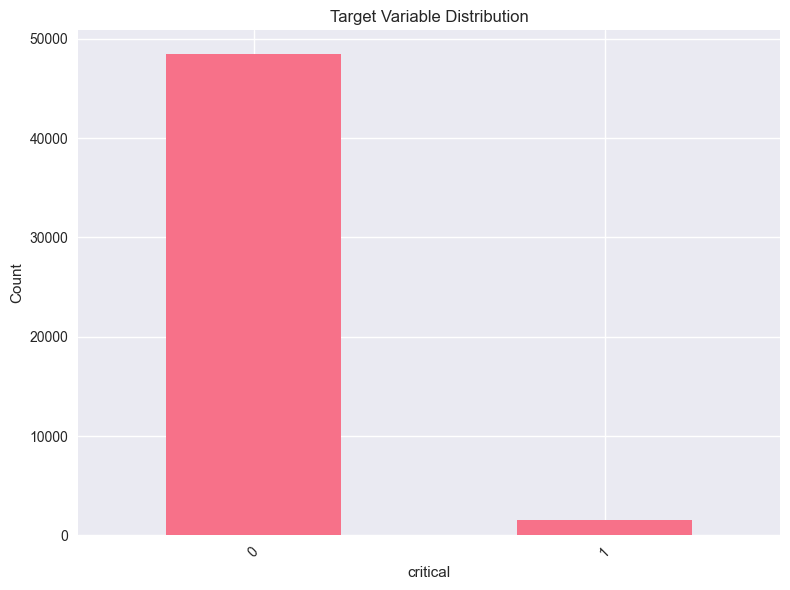

In [8]:
# Check target variable distribution (assuming there's a target column)
# Update this based on the actual column names in your dataset
target_cols = [col for col in df.columns if 'critical' in col.lower() or 'incident' in col.lower() or 'target' in col.lower()]
if target_cols:
    target_col = target_cols[0]
    print(f"Target column: {target_col}")
    print(f"Target distribution:")
    print(df[target_col].value_counts())
    
    # Plot target distribution
    plt.figure(figsize=(8, 6))
    df[target_col].value_counts().plot(kind='bar')
    plt.title('Target Variable Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No obvious target column found. Available columns:")
    print(df.columns.tolist())

# Note: Continue with feature engineering, model training, and evaluation
# This notebook provides a comprehensive framework for ML model development
